## AutoInland Vehicle Insurance Claim

### Data Description
The data describes ~ 12,000 policies sold by AutoInland for car insurance. Information on the car type, make, customer age and start of policy are in the data.

### Objective
The objective of this hackathon is to develop a predictive model that determines if a customer will submit a vehicle insurance claim in the next three months. This solution will help streamline financial planning at AutoInland and allow them to better serve their customers by understanding which customers are likely to submit a claim.


### Metric for Success
1. Come up with a model that will be used to predict whether a customer will submit a vehicle insurance claim in the next 3 months.
2. Test the model using the confusion matrix and the accuracy test.
3. Predict the customers who will submit a vehicle insurance claim using the provided test dataset.

### Experimental Design
Import necessary libraries

Import dataset

Exploring data

Data cleaning

1. Formatting Data Types
2. Checking & handling missing values
3. Checking for duplicates
4. Checking for outliers

EDA

1. Checking the distribution of the features
2. Multivariate analysis - Correlation


Modelling

1. Logistic Regression
2. Support Vector Machine(SVM) 
3. Decision Tree Classifier
4. K-Nearest Neighbour
5. Random Forest Classifier

Validating the model

By fitting the most accurate model into our cleaned test data.


### Importing the necessary libraries & Loading the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
## Loading the train data
df = pd.read_csv("C:\\Users\\Wangari Kimani\\Documents\\MSc DSA\\FCC\\PRACTICE\\WiD Datathon\\abc\\Train.csv")
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


### Exploring & Cleaning the Data

### Task 1. Exploring the data

In [4]:
# Checking the last 10 rows of the data
df.tail(10)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
12069,ID_ZYMVRIU,2010-05-23,2011-05-22,Male,58,2010-05-23,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
12070,ID_ZYYEGH8,2010-07-10,2011-04-20,Male,38,2010-07-10,2,Saloon,NaN,TOYOTA,NaN,NaN,Car Classic,1
12071,ID_ZZ0TC4R,2010-04-09,2011-04-08,Male,70,2010-04-09,3,Saloon,NaN,Kia,Port-Harcourt,Port-Harcourt,Car Classic,0
12072,ID_ZZ2U7VF,2010-09-16,2011-09-15,Male,38,2010-09-16,1,NaN,NaN,NaN,Obia/Akpor,Obia-Akpor,Car Classic,0
12073,ID_ZZ5JOXU,2010-08-08,2011-08-07,Female,31,2010-08-08,1,Saloon,Cream,Hyundai,Lagos Island,Lagos,Car Classic,0
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0
12078,ID_ZZWRIIE,2010-07-01,2011-06-30,Female,46,2010-07-01,2,JEEP,Black,Land Rover,Lagos Island,Lagos,Car Classic,0


In [5]:
# Checking the shape of the data 
df.shape

(12079, 14)

In [6]:
## Checking for duplicates
df.duplicated().any()

False

#### The data doesn't have any duplicates

In [7]:
## Checking the descriptive stats of the data
df.describe

<bound method NDFrame.describe of                ID Policy Start Date Policy End Date  Gender  Age  \
0      ID_0040R73        2010-05-14      2011-05-13    Male   30   
1      ID_0046BNK        2010-11-29      2011-11-28  Female   79   
2      ID_005QMC3        2010-03-21      2011-03-20    Male   43   
3      ID_0079OHW        2010-08-21      2011-08-20    Male    2   
4      ID_00BRP63        2010-08-29      2010-12-31  Entity   20   
...           ...               ...             ...     ...  ...   
12074  ID_ZZA1SES        2010-05-25      2011-05-24  Female   30   
12075  ID_ZZDAC3K        2010-10-03      2011-10-02  Female   59   
12076  ID_ZZIU2XC        2010-10-10      2011-10-08    Male   34   
12077  ID_ZZRQ1NF        2010-02-27      2011-02-26     NaN  120   
12078  ID_ZZWRIIE        2010-07-01      2011-06-30  Female   46   

      First Transaction Date  No_Pol Car_Category Subject_Car_Colour  \
0                 2010-05-14       1       Saloon              Black   
1    

### Task 2. Data Cleaning - Formatting Data Types

In [8]:
# Checking the data types of the data
df.dtypes

ID                        object
Policy Start Date         object
Policy End Date           object
Gender                    object
Age                        int64
First Transaction Date    object
No_Pol                     int64
Car_Category              object
Subject_Car_Colour        object
Subject_Car_Make          object
LGA_Name                  object
State                     object
ProductName               object
target                     int64
dtype: object

In [9]:
## Changing the data types of Policy Start Date, Policy End Date & First Transaction Date
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])
df['First Transaction Date'] = pd.to_datetime(df['First Transaction Date'])



In [10]:
## Confirming the data types have been changed
df.dtypes

ID                                object
Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
Gender                            object
Age                                int64
First Transaction Date    datetime64[ns]
No_Pol                             int64
Car_Category                      object
Subject_Car_Colour                object
Subject_Car_Make                  object
LGA_Name                          object
State                             object
ProductName                       object
target                             int64
dtype: object

### Task 3. Data Cleaning - Handling Missing Values

In [11]:
## Checking for any missing values
df.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [12]:
## Getting the percentage of missing data
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df)*100
    if null_rate > 0:
        print('{} null rate is: {}%' .format(i,round(null_rate,2)))

Gender null rate is: 2.97%
Car_Category null rate is: 30.95%
Subject_Car_Colour null rate is: 57.64%
Subject_Car_Make null rate is: 20.5%
LGA_Name null rate is: 53.61%
State null rate is: 53.71%


In [13]:
## Checking the percentage of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Subject_Car_Colour,6962,0.576372
State,6488,0.537131
LGA_Name,6476,0.536137
Car_Category,3738,0.309463
Subject_Car_Make,2476,0.204984
Gender,359,0.029721
ID,0,0.000000
Policy Start Date,0,0.000000
Policy End Date,0,0.000000
Age,0,0.000000


##### From the above observations, we can see that there are a few columns with alot of missing values. I opted to drop the ones with missing values above 31%, since already a huge chunk of information is missing and that would not be helpful in our analysis.

In [14]:
df = df.drop((missing_data[missing_data['Percent'] > 0.31]).index,1)
df.isnull().sum()


C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_11936\3036251894.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop((missing_data[missing_data['Percent'] > 0.31]).index,1)


ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Make          2476
ProductName                  0
target                       0
dtype: int64

In [15]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [16]:
## Dealing with missing data in Gender using mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [17]:
df.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                       0
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Make          2476
ProductName                  0
target                       0
dtype: int64

In [18]:
## Dealing with missing data in Car category & subject car make using forward fill & Backward fill
df['Car_Category'] = df['Car_Category'].fillna(method = 'ffill')
df['Subject_Car_Make'] = df['Subject_Car_Make'].fillna(method = 'bfill')

In [19]:
df.isnull().sum() # Confirming that all the missing values have been dealt with

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Make          0
ProductName               0
target                    0
dtype: int64

### Task 3. Data Cleaning - Handling Outliers

In [20]:
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category', 'Subject_Car_Make',
       'ProductName', 'target'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

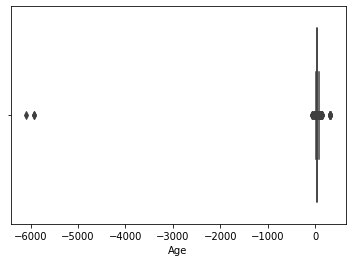

In [21]:
## Checking for outliers in the age column
sns.boxplot(data = df, x = 'Age')

#### There are clearly outliers in the age column


In [22]:
df['Age'].describe()

count    12079.000000
mean        42.234539
std         97.492565
min      -6099.000000
25%         35.000000
50%         41.000000
75%         50.000000
max        320.000000
Name: Age, dtype: float64

In [23]:
# identifying the outliers under age
df_age_over = df.loc[df['Age'] > 100]
print(df_age_over)

               ID Policy Start Date Policy End Date  Gender  Age  \
13     ID_00XG988        2010-03-26      2011-03-25  Female  120   
38     ID_03O8OI6        2010-05-08      2011-05-07    Male  120   
54     ID_058YC0S        2010-11-28      2011-11-27    Male  120   
72     ID_070SYAE        2010-04-17      2011-04-16    Male  120   
78     ID_07L368O        2010-09-16      2010-12-31    Male  120   
...           ...               ...             ...     ...  ...   
11977  ID_ZPICGRK        2010-07-23      2011-07-22    Male  120   
12011  ID_ZT9FSYF        2010-10-02      2011-04-21    Male  120   
12013  ID_ZTESDK9        2010-06-06      2011-02-16    Male  120   
12030  ID_ZUOZDSW        2010-07-04      2011-07-02    Male  120   
12077  ID_ZZRQ1NF        2010-02-27      2011-02-26    Male  120   

      First Transaction Date  No_Pol Car_Category Subject_Car_Make  \
13                2010-03-26       2       Saloon           TOYOTA   
38                2010-05-08       2       

In [24]:
df_age_under = df.loc[df['Age'] < 18]
print(df_age_under)

               ID Policy Start Date Policy End Date        Gender  Age  \
3      ID_0079OHW        2010-08-21      2011-08-20          Male    2   
25     ID_02390ZY        2010-12-11      2011-12-10          Male    1   
33     ID_034XN1U        2010-07-02      2011-07-01          Male    2   
74     ID_076DFB7        2010-08-08      2011-08-07  Joint Gender    1   
76     ID_0790YUZ        2010-09-30      2011-08-13        Female   11   
...           ...               ...             ...           ...  ...   
11870  ID_ZEEF6M5        2010-11-22      2011-11-21        Female    1   
11941  ID_ZLVBMY0        2010-05-01      2011-04-30          Male    3   
11960  ID_ZNLLMEF        2010-03-26      2011-03-25        Female    1   
11965  ID_ZOANOBE        2010-10-10      2011-10-09          Male    2   
12012  ID_ZTDPWLS        2010-09-30      2011-09-29          Male    1   

      First Transaction Date  No_Pol Car_Category Subject_Car_Make  \
3                 2010-08-21       1     

In [25]:
## We drop the ages that are above 100
df = df.drop(df[df.Age > 100].index)
df.shape

(11704, 11)

In [26]:
## We drop the ages that are less than 1
df = df.drop(df[df.Age < 1].index)
df.shape

(11686, 11)

In [27]:
## For the ages that are below 18, we replace with the 25th percentile, which is 35
df.loc[df['Age'] < 18,'Age'] = 35

In [28]:
## For the ages that are above 80, we replace with the 75th percentile, which is 50
df.loc[df['Age'] > 80,'Age'] = 50

In [29]:
df['Age'].describe()

count    11686.000000
mean        42.329197
std         11.114638
min         18.000000
25%         35.000000
50%         40.000000
75%         49.000000
max         80.000000
Name: Age, dtype: float64

In [30]:
df.shape

(11686, 11)

In [31]:
#Checking the unique gender features
df['Gender'].unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [32]:
## Removing the outliers in Gender
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
df.Gender = df.Gender.replace(mapper)

# Confirm mappings
df.Gender.value_counts()

Male      7663
Female    3287
Other      736
Name: Gender, dtype: int64

<AxesSubplot:xlabel='No_Pol'>

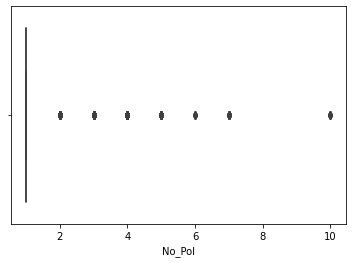

In [33]:
sns.boxplot(data = df,x = 'No_Pol')

### Task 4 EDA

Text(0.5, 1.0, 'n_uniques = 3 \n value counts \n Male      0.655742\nFemale    0.281277\nOther     0.062981\nName: Gender, dtype: float64;')

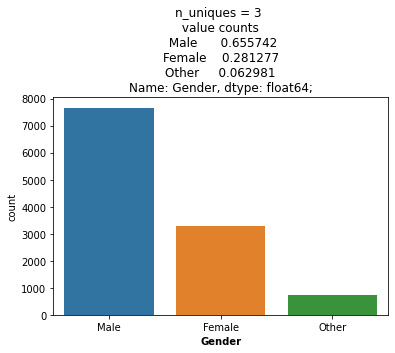

In [34]:
#CountPlot for Gender

# Count Values to display on the chart
norm_count = df['Gender'].value_counts(normalize = True)
n_uni = df['Gender'].nunique()

#Display Chart

sns.countplot(x = df['Gender']);
#Display Labels
plt.xlabel('Gender',fontweight='bold')
plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11686 entries, 0 to 12078
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      11686 non-null  object        
 1   Policy Start Date       11686 non-null  datetime64[ns]
 2   Policy End Date         11686 non-null  datetime64[ns]
 3   Gender                  11686 non-null  object        
 4   Age                     11686 non-null  int64         
 5   First Transaction Date  11686 non-null  datetime64[ns]
 6   No_Pol                  11686 non-null  int64         
 7   Car_Category            11686 non-null  object        
 8   Subject_Car_Make        11686 non-null  object        
 9   ProductName             11686 non-null  object        
 10  target                  11686 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(5)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'n_uniques = 2 \n value counts \n 0    0.882338\n1    0.117662\nName: target, dtype: float64;')

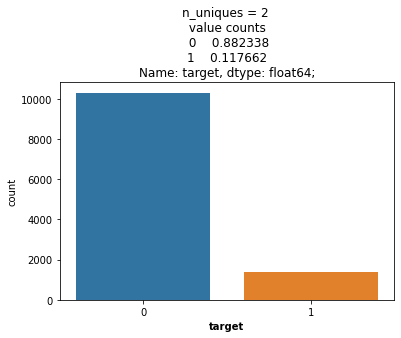

In [36]:
#CountPlot for target

# Count Values to display on the chart
norm_count = df['target'].value_counts(normalize = True)
n_uni = df['target'].nunique()

#Display Chart

sns.countplot(x = df['target']);
#Display Labels
plt.xlabel('target',fontweight='bold')
plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

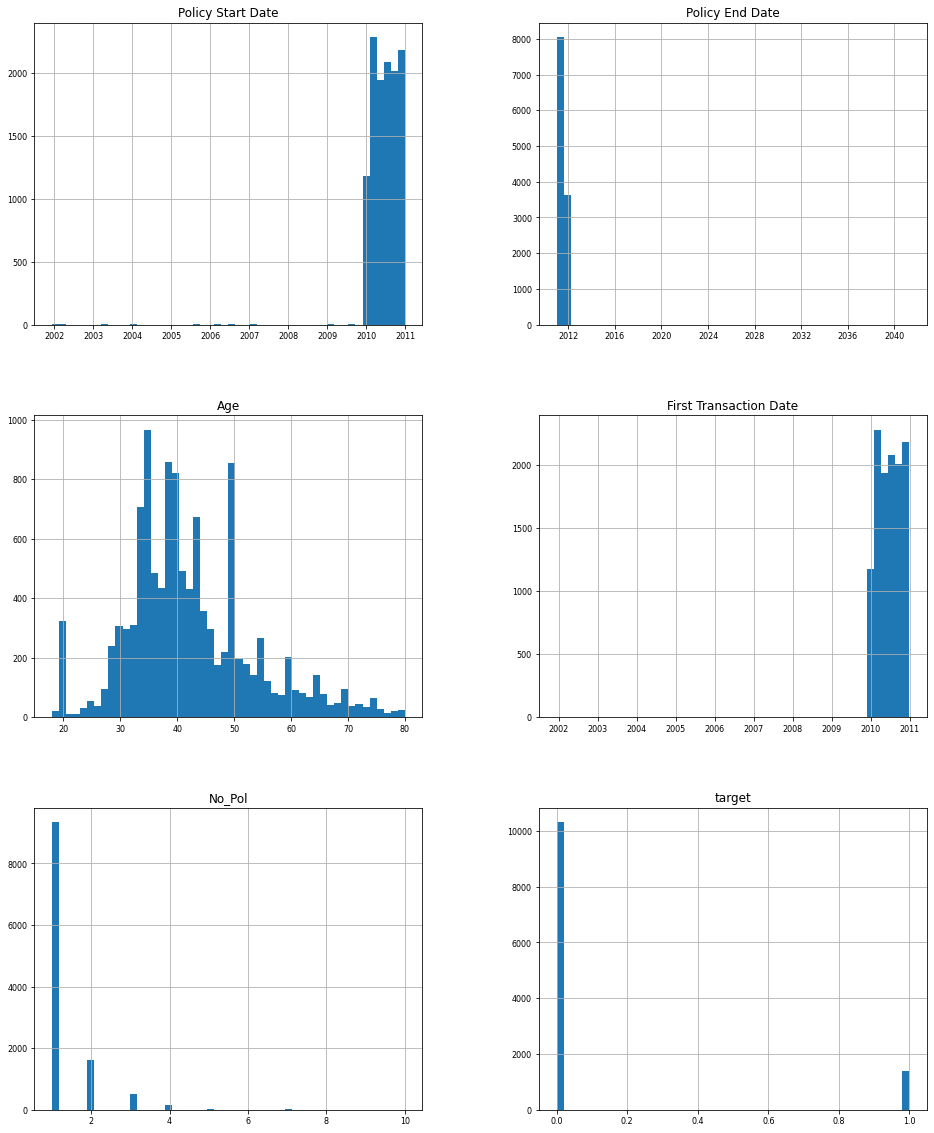

In [37]:
## Creating a histogram to see the distribution of our features.
df.hist(figsize = (16,20), bins=50, xlabelsize=8, ylabelsize=8);

### Task 5 Multivariate Analysis

#### Correlation

In [38]:
## Find correlation in variables
df.corr().head()

,Age,No_Pol,target
Age,1.000000,0.037263,-0.093783
No_Pol,0.037263,1.000000,0.046949
target,-0.093783,0.046949,1.000000


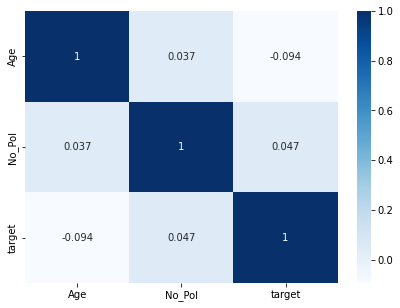

In [39]:
# Plotting a heat map
plt.figure(figsize = (7,5))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap = plt.cm.Blues)
plt.show;

In [40]:
#Correlation with the output variable
cor_target = abs(cor['target'])
print(cor_target)

Age       0.093783
No_Pol    0.046949
target    1.000000
Name: target, dtype: float64


### Task 6. Modelling

#### Logistic Regression

In [41]:
df.dtypes

ID                                object
Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
Gender                            object
Age                                int64
First Transaction Date    datetime64[ns]
No_Pol                             int64
Car_Category                      object
Subject_Car_Make                  object
ProductName                       object
target                             int64
dtype: object

In [42]:
## Conversion of data types
df['Gender'] = df['Gender'].astype('category')
df['Car_Category'] = df['Car_Category'].astype('category')
df['Subject_Car_Make'] = df['Subject_Car_Make'].astype('category')
df['ProductName'] = df['ProductName'].astype('category')



In [43]:
df['ID'] = df['ID'].astype('category')

In [44]:
## Importing more libraries
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [45]:
#initializing an object of class LabelEncoder
labelencoder= LabelEncoder() 

#fitting and transforming the Gender categorical column.
df['Gender'] = labelencoder.fit_transform(df['Gender']) 

#fitting and transforming the Car_Category column
df['Car_Category'] = labelencoder.fit_transform(df['Car_Category'])

#fitting and transforming the Car_Category column
df['Subject_Car_Make'] = labelencoder.fit_transform(df['Subject_Car_Make'])

#fitting and transforming the Car_Category column
df['ProductName'] = labelencoder.fit_transform(df['ProductName'])

In [46]:
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category', 'Subject_Car_Make',
       'ProductName', 'target'],
      dtype='object')

In [47]:
# setting the x and y variables
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression
X = df[['Gender','Age','No_Pol','Car_Category',
'Subject_Car_Make','ProductName']]
y = df['target'].values

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Fitting our logistic regression  model to our train sets 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
#using our model to make predictions
y_pred = LogReg.predict(X_test)

In [49]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2078,    2],
       [ 258,    0]], dtype=int64)

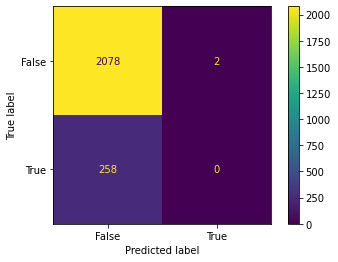

In [50]:
# Evaluating the model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### Our model accurately placed 2078 and 0 true negatives and true positives. It however still finished with 258 false positives and 2 false negatives

#### SVM Model

In [51]:
# Import the required libraries.
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection

#### SVM uses a set of mathematical functions defined as the kernel. The ernel takes data as input and transform it into the required form.
We have different types of kernels
Linear, nonlinear, polynomial, radial basis function and sigmoid. RBF is the most used because it has localized and finite response along the x-axis

In [52]:
# We build our model and fit our data to a sigmoid 
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [53]:
# Make predictions using our model
svcpred = svc.predict(X_test)

In [54]:
# Use k-fold 10 fold split to validate performance of our model.
#splitting our data to different subsets so that our model can train better.
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [55]:
# Access the accuracy of our model.
kfold = model_selection.KFold(n_splits=10)
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

81.0


#####  We achieved 81% accuracy using sigmoid, this means our model is performing as desired.

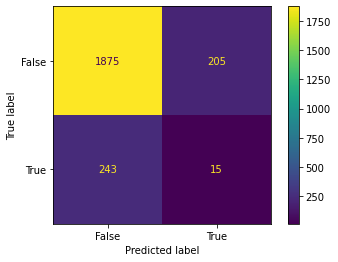

In [56]:
# Use confusion matrix to access/ visualize how our model classified or performed.
confusion_matrix = metrics.confusion_matrix(y_test, svcpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### Our model managed to correctly classify 67 true positives( predicted values predited as actual positive) and 160 true negatives( predicted values correctly as an actual negative), as seen in the accuracy score, the model performance is poor. The model is struggling in identifying customers who buy or not buy a phone.

### SVM ~ RBF Kernel

89.0


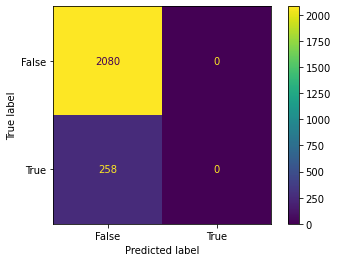

In [57]:
# We build our model and fit our data to a rbf
svc= SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
# Make predictions using our model
svcpred = svc.predict(X_test)
# Access the accuracy of our model.
kfold = model_selection.KFold(n_splits=10)
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
# Use confusion matrix to access/ visualize how our model classified or performed.
confusion_matrix = metrics.confusion_matrix(y_test, svcpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### We achieved 89% accuracy using rbf kernel, it is an improvement from the sigmoid model.The model predicted 2080 true negatives and 258 false negatives

### Decision Tree Classifier

Decision tree is a supervised learning technique that can be used both for classification and regression. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node. This is continuous until ir reaches the leaf node of the tree

In [58]:
# import decision tree library
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
# fit our data to our model
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

In [59]:
#Access the accuracy of our model
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

86.0


Our model achieved 86% accuracy, this is lower than the SVM model.

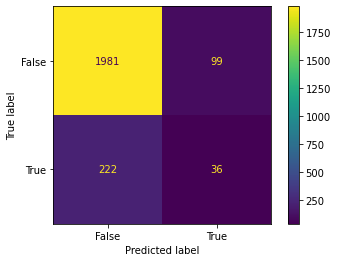

In [60]:
# Visualize model performance using a confusion matrix to access recall and precision
confusion_matrix = metrics.confusion_matrix(y_test, dtreepred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

 The model struggled in identifying true positives and true negatives. The model correctly predicts 35 and 1983 true positive and true negative values respectively, it however still identified 97 false positives and 223 false negatives.

### Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [61]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
#fit data to to our model
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

In [62]:
# access the accuracy of our model
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

88.0


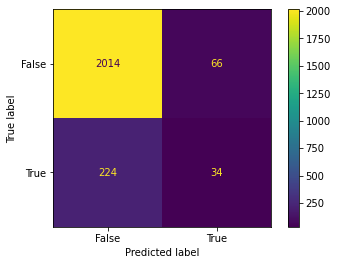

In [63]:
# Evaluating the model using confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, rfcpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### K-Nearest

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another

In [64]:
#import knearest classifier.
from sklearn.neighbors import KNeighborsClassifier
# Build the model
knn = KNeighborsClassifier(n_neighbors=22)
#fit the data to our model
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

In [65]:
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

89.0


Our model acheived 89% accuracy, this is the same as the SVM rbf model

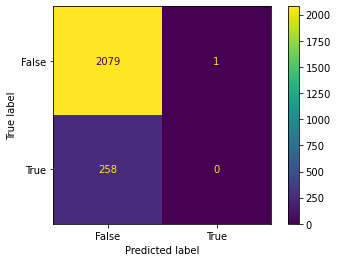

In [66]:
# Evaluating the model
confusion_matrix = metrics.confusion_matrix(y_test, knnpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Our K-nearest model placed 0 and 2079 true positives and true negatives. It however still finished with 1 false positive and 258 false negatives.

### Ensemble Averaging Method

To challenge the model we used an ensemble averaging method. The method consists of building multiple models independently and returning the average of the prediction of all the models. In general, the combined output is better than an individual output because variance is reduced.

In the below example, three regression models (linear regression, xgboost, and random forest) are trained and their predictions are averaged. The final prediction output is pred_final

In [67]:
pip install xgboost


     -------------------------------------- 89.1/89.1 MB 175.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
## Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [69]:
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

0.08976005233040878


The MSE of the ensemble is 0.09, indicating the ensemble of our techniques has an accuracy of our 91%. Our model output individually at 89% is deemed to be satisfactory given the dataset we have.

### Exploring and Cleaning the Test Data

In [128]:
df2 = pd.read_csv("C:\\Users\\Wangari Kimani\\Documents\\MSc DSA\\FCC\\PRACTICE\\WiD Datathon\\abc\\Test.csv")
df2.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [129]:
## Checking the shape of the test data
df2.shape

(1202, 13)

In [130]:
## Checking for duplicates
df2.duplicated().any()

False

### Changing data types

In [131]:
# Checking the data types of the data
df2.dtypes

ID                        object
Policy Start Date         object
Policy End Date           object
Gender                    object
Age                        int64
First Transaction Date    object
No_Pol                     int64
Car_Category              object
Subject_Car_Colour        object
Subject_Car_Make          object
LGA_Name                  object
State                     object
ProductName               object
dtype: object

In [132]:
## Changing the data types of Policy Start Date, Policy End Date & First Transaction Date
df2['Policy Start Date'] = pd.to_datetime(df2['Policy Start Date'])
df2['Policy End Date'] = pd.to_datetime(df2['Policy End Date'])
df2['First Transaction Date'] = pd.to_datetime(df2['First Transaction Date'])

### Handling missing values

In [133]:
## We check whether the data contains any missing values
df2.isnull().sum()

ID                          0
Policy Start Date           0
Policy End Date             0
Gender                     41
Age                         0
First Transaction Date      0
No_Pol                      0
Car_Category              372
Subject_Car_Colour        697
Subject_Car_Make          248
LGA_Name                  656
State                     656
ProductName                 0
dtype: int64

In [134]:
## Checking the percentage of missing values
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data2

,Total,Percent
Subject_Car_Colour,697,0.579867
LGA_Name,656,0.545757
State,656,0.545757
Car_Category,372,0.309484
Subject_Car_Make,248,0.206323
Gender,41,0.034110
ID,0,0.000000
Policy Start Date,0,0.000000
Policy End Date,0,0.000000
Age,0,0.000000


In [135]:
## Dealing with missing data in Gender using mode
df2['Gender'] = df2['Gender'].fillna(df2['Gender'].mode()[0])

In [139]:
## Dealing with missing data in Subject_Car_Colour, LGA_Name & State car make using forward fill & Backward fill
df2['Subject_Car_Colour'] = df2['Subject_Car_Colour'].fillna(method = 'bfill')
df2['LGA_Name'] = df2['LGA_Name'].fillna(method = 'ffill')
df2['State'] = df2['State'].fillna(method = 'ffill')

In [137]:
## Dealing with missing data in Car category & subject car make using forward fill & Backward fill
df2['Car_Category'] = df2['Car_Category'].fillna(method = 'bfill')
df2['Subject_Car_Make'] = df2['Subject_Car_Make'].fillna(method = 'bfill')

In [140]:
## Confirming all missing values have been handled
df2.isnull().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
dtype: int64

### Dealing with Outliers

<AxesSubplot:xlabel='Age'>

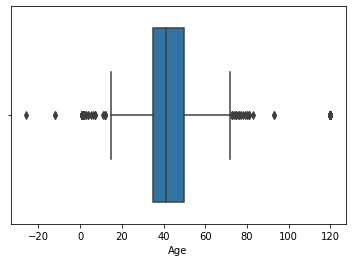

In [71]:
sns.boxplot(data = df2, x = 'Age')

In [72]:
df2['Age'].describe()

count    1202.000000
mean       43.792845
std        19.986245
min       -26.000000
25%        35.000000
50%        41.000000
75%        50.000000
max       120.000000
Name: Age, dtype: float64

In [141]:
## For the ages that are below 18, we replace with the 25th percentile, which is 35
df2.loc[df2['Age'] < 18,'Age'] = 35

## For the ages that are above 80, we replace with the 75th percentile, which is 50
df2.loc[df2['Age'] > 80,'Age'] = 50

In [142]:
df2['Age'].describe()

count    1202.000000
mean       42.609817
std        11.266509
min        18.000000
25%        35.000000
50%        41.000000
75%        50.000000
max        80.000000
Name: Age, dtype: float64

In [143]:
#Checking the unique gender features
df2['Gender'].unique()



array(['Female', 'Male', 'NOT STATED', 'Entity', 'NO GENDER',
       'Joint Gender', 'SEX'], dtype=object)

In [144]:
## Removing the outliers in Gender
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
df2.Gender = df2.Gender.replace(mapper)

# Confirm mappings
df2.Gender.value_counts()

Male      780
Female    352
Other      70
Name: Gender, dtype: int64

### Fitting the Model to our Validation Data

In [146]:
#initializing an object of class LabelEncoder
labelencoder= LabelEncoder() 

#fitting and transforming the Gender categorical column.
df2['Gender'] = labelencoder.fit_transform(df2['Gender']) 

#fitting and transforming the Car_Category column
df2['Car_Category'] = labelencoder.fit_transform(df2['Car_Category'])

#fitting and transforming the Car_Category column
df2['Subject_Car_Make'] = labelencoder.fit_transform(df2['Subject_Car_Make'])

#fitting and transforming the Car_Category column
df2['ProductName'] = labelencoder.fit_transform(df2['ProductName'])

In [147]:
## Conversion of data types
df2['Gender'] = df2['Gender'].astype('category')
df2['Car_Category'] = df2['Car_Category'].astype('category')
df2['Subject_Car_Make'] = df2['Subject_Car_Make'].astype('category')
df2['ProductName'] = df2['ProductName'].astype('category')
df2['ID'] = df2['ID'].astype('category')

In [148]:
## Adding the empty target variable to the test data
df2['target'] = ''

In [149]:
df2.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [150]:
df2['target']

0        
1        
2        
3        
4        
       ..
1197     
1198     
1199     
1200     
1201     
Name: target, Length: 1202, dtype: object

In [151]:
## Defining our X and Y variables used in fitting the model
X = df2[['Gender','Age','No_Pol','Car_Category',
'Subject_Car_Make','ProductName']]
y = df2['target'].values

In [182]:
X.shape

(1202, 6)

In [183]:
## Predicting our y variable 
y_pred = dtree.predict(X)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [184]:
y_pred.shape

(1202,)

In [185]:
## Connecting our ID column and the predicted column
label =[df2['ID'],y_pred]
label

[0       ID_01QM0NU
 1       ID_024NJLZ
 2       ID_02NOVWQ
 3       ID_02VSP68
 4       ID_02YB37K
            ...    
 1197    ID_ZTTHC5X
 1198    ID_ZUJAFUP
 1199    ID_ZWHCTUM
 1200    ID_ZWQRL8L
 1201    ID_ZWZ92GU
 Name: ID, Length: 1202, dtype: category
 Categories (1202, object): ['ID_01QM0NU', 'ID_024NJLZ', 'ID_02NOVWQ', 'ID_02VSP68', ..., 'ID_ZUJAFUP', 'ID_ZWHCTUM', 'ID_ZWQRL8L', 'ID_ZWZ92GU'],
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [186]:
## Creating a new dataframe containing the ID and the Predicted well-being variable
df_result = pd.DataFrame(label)
df_result

,0,1,2,3,4,5,6,7,8,9,...,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201
ID,ID_01QM0NU,ID_024NJLZ,ID_02NOVWQ,ID_02VSP68,ID_02YB37K,ID_04OFD80,ID_04UA1UO,ID_06QWOUO,ID_06SOU7C,ID_0CRE393,...,ID_ZP4DSAM,ID_ZPP94KU,ID_ZQZ5AFX,ID_ZRCEQL0,ID_ZS4AMG0,ID_ZTTHC5X,ID_ZUJAFUP,ID_ZWHCTUM,ID_ZWQRL8L,ID_ZWZ92GU
Unnamed 0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
## Transposing our new dataframe
Results = df_result.transpose()
Results.head()

,ID,Unnamed 0
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0


In [188]:
## Renaming the unnamed column
Results.rename(columns = {'Unnamed 0':'target'}, inplace = True)
Results.head()

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0


In [189]:
## Saving our new dataframe to a csv file
Results.to_csv('Submission_final1.csv')